## Import libraries


In [1]:
import os

In [2]:
os.chdir('../../data/credb')

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## 2차자료 설명
   
    join_key : 차주 id
    gender : 성별
    ln_amt : 기준시점 기준, 총 대출금액
    num_overdue : 기준시점 기준, 연체 건수
    dlq : 기준시점 이전, 연체 경험 여부
    ex_long : 기준시점 이전, 장기연체 경험 여부
    long : 2018년 내 장기연체 여부
    num_loan : 기준시점 이전, 총 대출 건수
    repay_rate : 기준시점 기준, 대출규모 대비 상환율
    over_3y : 신용거래(첫 대출 이후) 3년 이상 여부
    cnt_1st : 1금융권 대출 보유 건수
    cnt_2nd : 2금융권 대출 보유 건수
    cnt_card : 신용카드사 상품 보유 건수
    cnt_insurance : 보험사 상품 보유 건수

In [5]:
dat = pd.read_csv("credb.csv")

In [6]:
dat.isnull().sum()

join_key         0
gender           0
ln_amt           0
dlq_amt          0
num_overdue      0
ex_long          0
long             0
num_loan         0
repay_rate       0
over_3y          0
cnt_1st          0
cnt_2nd          0
cnt_card         0
cnt_insurance    0
age              0
dtype: int64

In [7]:
dat.describe()

,gender,ln_amt,dlq_amt,num_overdue,ex_long,long,num_loan,repay_rate,over_3y,cnt_1st,cnt_2nd,cnt_card,cnt_insurance,age
count,494.000000,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,1.378543,8.216249e+04,790.141700,0.105263,0.089069,0.054656,0.178138,0.976874,0.412955,1.506073,0.198381,0.419028,0.046559,45.483806
std,0.485515,1.308206e+05,5650.224195,0.460457,0.285132,0.227538,0.671536,0.111693,0.492864,0.822456,0.588184,0.984938,0.220313,12.342260
min,1.000000,1.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,1.000000,0.000000,0.000000,0.000000,18.000000
25%,1.000000,1.012500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,36.000000
50%,1.000000,4.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,2.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,53.000000
max,2.000000,1.800000e+06,83600.000000,4.000000,1.000000,1.000000,5.000000,1.000000,1.000000,6.000000,5.000000,6.000000,2.000000,82.000000


## 범주화

    : 로지스틱 회귀방법에 기반한 신용평가 모형개발에서 '연체 건수', '보유대출 건수'와 같은 이산형 변수를 그대로 이용할 경우, 자료 수의 차이 등으로 인해 불안정한 값을 보여주며 불량률에 따른 효과를 정확히 확인할 수 없음. 
    
    : 이에 '항목 유의성 분석'을 통해 다수 그룹으로 세부 분류하여 변별력 및 서열화, 구간별 구성비, 의미의 타당성 등을 고려하여 모형에 포함할 변수를 선별.
    
    : 이때, 불량률 혹은 오즈비율이 구간에 따라 단조 증가 또는 단조 감소하는 추세가 있는지 확인해야함.


[참고문헌] 김종윤, 통신 빅데이터 활용 개인신용평가모형(통신스코어) 개발, 2019.


* age_group

In [8]:
var = 'age'

In [9]:
# cutpoints = list(range(-1,int(dat[var].max())+1))
cutpoints = [int(dat[var].min())-1,38,53,int(dat[var].max())+1]

In [10]:
group_var = var+'_group'
group_var

'age_group'

In [11]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,age_group,join_key,long
0,"(17, 38]",151,0.059603
1,"(38, 53]",224,0.058036
2,"(53, 83]",119,0.042017


In [12]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints,labels=False)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,age_group,join_key,long
0,0,151,0.059603
1,1,224,0.058036
2,2,119,0.042017


In [13]:
dat[group_var].isna().sum()

0

In [14]:
dat[group_var] = dat[group_var].astype('object')

* num_overdue

In [15]:
var = 'num_overdue'

In [16]:
group_var = var+'_group'
group_var

'num_overdue_group'

In [17]:
# cutpoints = list(range(-1,int(dat[var].max())))
cutpoints = [-1,0,1,int(dat[var].max())]

In [18]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,num_overdue_group,join_key,long
0,"(-1, 0]",463,0.028078
1,"(0, 1]",17,0.411765
2,"(1, 4]",14,0.500000


In [19]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints,labels=False)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,num_overdue_group,join_key,long
0,0,463,0.028078
1,1,17,0.411765
2,2,14,0.500000


In [20]:
dat[group_var].isna().sum()

0

In [21]:
dat[group_var] = np.max(dat[group_var]) - dat[group_var].values

In [22]:
dat[group_var] = dat[group_var].astype('object')

* num_loan

In [23]:
var = 'num_loan'

In [24]:
group_var = var+'_group'
group_var

'num_loan_group'

In [25]:
# cutpoints = list(range(-1,int(dat[var].max())+1))
cutpoints = [-1,0,1,int(dat[var].max())]

In [26]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,num_loan_group,join_key,long
0,"(-1, 0]",448,0.015625
1,"(0, 1]",24,0.333333
2,"(1, 5]",22,0.545455


In [27]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints,labels=False)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,num_loan_group,join_key,long
0,0,448,0.015625
1,1,24,0.333333
2,2,22,0.545455


In [28]:
dat[group_var].isna().sum()

0

In [29]:
dat[group_var] = np.max(dat[group_var]) - dat[group_var].values

In [30]:
dat[group_var] = dat[group_var].astype('object')

* repay_rate

In [31]:
var = 'repay_rate'

In [32]:
group_var = var+'_group'
group_var

'repay_rate_group'

In [33]:
# cutpoints = list(np.arange(0,1.2,step=0.2))
cutpoints = [0,0.5,0.8,1]

In [34]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,repay_rate_group,join_key,long
0,"(0.0, 0.5]",12,0.500000
1,"(0.5, 0.8]",9,0.222222
2,"(0.8, 1.0]",473,0.040169


In [35]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints,labels=False)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,repay_rate_group,join_key,long
0,0,12,0.500000
1,1,9,0.222222
2,2,473,0.040169


In [36]:
dat[group_var].isna().sum()

0

In [37]:
dat[group_var] = dat[group_var].astype('object')

* cnt_1st

In [38]:
var = 'cnt_1st'

In [39]:
group_var = var+'_group'
group_var

'cnt_1st_group'

In [40]:
cutpoints = list(np.arange(0,dat[var].max(),step=1))
cutpoints = [0,1,dat[var].max()]

In [41]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,cnt_1st_group,join_key,long
0,"(0.0, 1.0]",323,0.043344
1,"(1.0, 6.0]",171,0.076023


In [42]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints,labels=False)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,cnt_1st_group,join_key,long
0,0,323,0.043344
1,1,171,0.076023


In [43]:
dat[group_var].isna().sum()

0

In [44]:
dat[group_var] = np.max(dat[group_var]) - dat[group_var].values

In [45]:
dat[group_var] = dat[group_var].astype('object')

* cnt_2nd

In [46]:
var = 'cnt_2nd'

In [47]:
group_var = var+'_group'
group_var

'cnt_2nd_group'

In [48]:
# cutpoints = list(np.arange(-1,dat[var].max(),step=1))
cutpoints = [-1,0,dat[var].max()]

In [49]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,cnt_2nd_group,join_key,long
0,"(-1.0, 0.0]",428,0.042056
1,"(0.0, 5.0]",66,0.136364


In [50]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints,labels=False)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,cnt_2nd_group,join_key,long
0,0,428,0.042056
1,1,66,0.136364


In [51]:
dat[group_var].isna().sum()

0

In [52]:
dat[group_var] = np.max(dat[group_var]) - dat[group_var].values

In [53]:
dat[group_var] = dat[group_var].astype('object')

* cnt_card

In [54]:
var = 'cnt_card'

In [55]:
group_var = var+'_group'
group_var

'cnt_card_group'

In [56]:
# cutpoints = list(np.arange(-1,dat[var].max(),step=1))
cutpoints = [-1,0,dat[var].max()]

In [57]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,cnt_card_group,join_key,long
0,"(-1.0, 0.0]",386,0.033679
1,"(0.0, 6.0]",108,0.129630


In [58]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints,labels=False)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,cnt_card_group,join_key,long
0,0,386,0.033679
1,1,108,0.129630


In [59]:
dat[group_var].isna().sum()

0

In [60]:
dat[group_var] = np.max(dat[group_var]) - dat[group_var].values

In [61]:
dat[group_var] = dat[group_var].astype('object')

* cnt_insurance

In [62]:
var = 'cnt_insurance'

In [63]:
group_var = var+'_group'
group_var

'cnt_insurance_group'

In [64]:
# cutpoints = list(np.arange(-1,dat[var].max(),step=1))
cutpoints = [-1,0,dat[var].max()]

In [65]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,cnt_insurance_group,join_key,long
0,"(-1.0, 0.0]",472,0.052966
1,"(0.0, 2.0]",22,0.090909


In [66]:
dat[group_var] = pd.cut(dat[var],bins=cutpoints,labels=False)
dat.groupby([group_var],as_index=False).agg({'join_key':'count','long':'mean'})

,cnt_insurance_group,join_key,long
0,0,472,0.052966
1,1,22,0.090909


In [67]:
dat[group_var].isna().sum()

0

In [68]:
dat[group_var] = np.max(dat[group_var]) - dat[group_var].values

In [69]:
dat[group_var] = dat[group_var].astype('object')

In [70]:
data = dat.drop(['ln_amt','dlq_amt','num_loan','num_overdue','repay_rate','age','ex_long',
                 'num_overdue_group','age_group',
                'cnt_1st','cnt_2nd','cnt_card','cnt_insurance'],axis=1)

In [71]:
data = pd.concat([data[data.columns.difference(['long'])].astype('object'),dat['long']],axis=1).set_index('join_key')

## Model fitting

### Train/Test split

In [72]:
features = data.columns.difference(['long'])
target = ['long']

In [73]:
features

Index(['cnt_1st_group', 'cnt_2nd_group', 'cnt_card_group',
       'cnt_insurance_group', 'gender', 'num_loan_group', 'over_3y',
       'repay_rate_group'],
      dtype='object')

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

In [75]:
data = pd.get_dummies(data[list(features) + list(target)],drop_first=True)

In [76]:
dat1 = data[data['long']==1]
dat2 = data[data['long']==0]

In [77]:
train1, test1 = train_test_split(dat1,train_size=0.6,random_state=1)
train2, test2 = train_test_split(dat2,train_size=0.6,random_state=1)

In [78]:
train = pd.concat([train1,train2],axis=0)
test = pd.concat([test1,test2],axis=0)

: target이 class imbalance하므로, 각 그룹에 대하여 동일한 비율로 훈련데이터와 검증데이터를 구성하였다 

In [79]:
print(train.shape,test.shape)

(296, 11) (198, 11)


In [80]:
X_train = train[train.columns.difference(target)]
y_train = train[target]

X_test = test[test.columns.difference(target)]
y_test = test[target]

### Logistic Regression

In [81]:
import statsmodels.api as sm

In [82]:
logit_model = sm.Logit(y_train,sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.120575
         Iterations 9


In [83]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   long   No. Observations:                  296
Model:                          Logit   Df Residuals:                      285
Method:                           MLE   Df Model:                           10
Date:                Thu, 17 Dec 2020   Pseudo R-squ.:                  0.4266
Time:                        17:27:01   Log-Likelihood:                -35.690
converged:                       True   LL-Null:                       -62.244
Covariance Type:            nonrobust   LLR p-value:                 7.113e-08
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.9115      1.809      1.057      0.291      -1.634       5.457
cnt_1st_group_1          -0.1950      0.676     -0.288      0.773      -1.520       1.130
cnt_2nd_group_1           1.2473      0.836      1.493      0.136      -0.391       2.885
cnt_card_group_1         -2.4304      0.793     -3.066      0.002      -3.984      -0.877
cnt_insurance_group_1    -2.0238      1.305     -1.551      0.121      -4.582       0.534
gender_2                 -0.9414      0.810     -1.163      0.245      -2.528       0.646
num_loan_group_1          0.0991      1.038      0.095      0.924      -1.936       2.134
num_loan_group_2         -4.5703      1.087     -4.203      0.000      -6.702      -2.439
over_3y_1.0               0.2241      0.699      0.321      0.749      -1.146       1.594
repay_rate_group_1        0.1300      1.543      0.084      0.933      -2.895       3.155
repay_rate_group_2        1.1089      1.337      0.830      0.407      -1.511       3.729
=========================================================================================
"""

#### prediction

In [84]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, confusion_matrix, classification_report

In [85]:
from sklearn.metrics import roc_curve, auc

Area under the ROC curve : 0.931027
0.0743728927846421


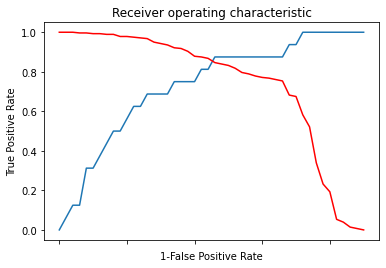

In [86]:
# 출처 : https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python

fpr, tpr, thresholds =roc_curve(y_train, logit_model.predict(sm.add_constant(X_train)))

roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################

i = np.arange(len(tpr)) 
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = thresholds[optimal_idx]
print(optimal_threshold_logit)

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])
plt.show()

In [87]:
y_pred1 = np.where(logit_model.predict(sm.add_constant(X_test))>optimal_threshold_logit,1,0)

In [88]:
precision_score(y_test,y_pred1)

0.22580645161290322

In [89]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
tp/(tp+fp)
print(tn, fp, fn, tp)

163 24 4 7


In [90]:
print(confusion_matrix(y_test,y_pred1))

[[163  24]
 [  4   7]]


In [91]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       187
           1       0.23      0.64      0.33        11

    accuracy                           0.86       198
   macro avg       0.60      0.75      0.63       198
weighted avg       0.93      0.86      0.89       198



In [92]:
logit_model2 = LogisticRegression(random_state=1,solver='lbfgs',fit_intercept=True, 
                                  penalty='none')
logit_model2.fit(X_train,y_train) 

LogisticRegression(penalty='none', random_state=1)

In [93]:
pd.concat([pd.DataFrame(logit_model2.intercept_[0],index=['const'],columns=['coef']),pd.DataFrame(logit_model2.coef_[0],index=X_train.columns,columns=['coef'])],axis=0)

,coef
const,1.911581
cnt_1st_group_1,-0.195027
cnt_2nd_group_1,1.247407
cnt_card_group_1,-2.430345
cnt_insurance_group_1,-2.023945
gender_2,-0.941333
num_loan_group_1,0.099108
num_loan_group_2,-4.570321
over_3y_1.0,0.224098
repay_rate_group_1,0.129981


Area under the ROC curve : 0.931027
0.07436930476735341


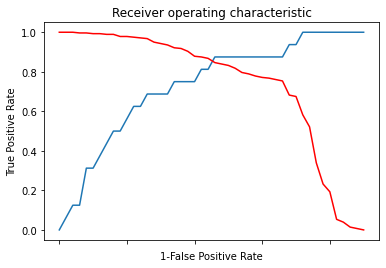

In [94]:
# 출처 : https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python

fpr, tpr, thresholds =roc_curve(y_train, logit_model2.predict_proba(X_train)[:,1])

roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################

i = np.arange(len(tpr)) 
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit2 = thresholds[optimal_idx]
print(optimal_threshold_logit2)

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])
plt.show()

In [95]:
y_pred2 = np.where(logit_model2.predict_proba(X_test)[:,1]>optimal_threshold_logit2,1,0)

In [96]:
print(confusion_matrix(y_test,y_pred2))

[[163  24]
 [  4   7]]


In [97]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       187
           1       0.23      0.64      0.33        11

    accuracy                           0.86       198
   macro avg       0.60      0.75      0.63       198
weighted avg       0.93      0.86      0.89       198



### RandomForest

#### Parameter Tuning

In [98]:
rfm = RandomForestClassifier()

In [99]:
params = {
          "n_estimators": [20,50,100,200],
          "max_depth" : [30,50,100],
          "min_samples_leaf" : [3,6,10],

          "criterion" : ['gini','entropy'], 
          "max_features" : ['sqrt'],
          "bootstrap" : [True],
          "oob_score" : [True],
          "n_jobs" : [-1],
          "random_state" : [1],
         }

In [100]:
grid = GridSearchCV(rfm,param_grid=params,n_jobs=-1,cv=5,verbose=1).fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   24.6s finished


In [101]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'n_estimators': 20,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 1}

#### Model Fitting

In [102]:
rf_model = RandomForestClassifier(**grid.best_params_,verbose=0)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=6,
                       n_estimators=20, n_jobs=-1, oob_score=True,
                       random_state=1)

Area under the ROC curve : 0.934821
0.06997642918453861


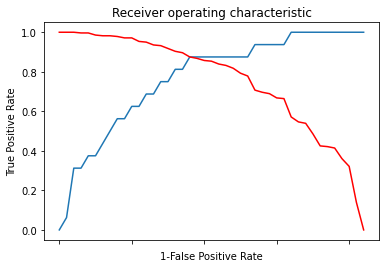

In [103]:
# 출처 : https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python

fpr, tpr, thresholds =roc_curve(y_train, rf_model.predict_proba(X_train)[:,1])

roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################

i = np.arange(len(tpr)) 
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_rf = thresholds[optimal_idx]
print(optimal_threshold_rf)

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])
plt.show()

In [104]:
y_pred3 = np.where(rf_model.predict_proba(X_test)[:,1]>optimal_threshold_rf,1,0)

In [105]:
print(confusion_matrix(y_test,y_pred3))

[[174  13]
 [  2   9]]


In [106]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       187
           1       0.41      0.82      0.55        11

    accuracy                           0.92       198
   macro avg       0.70      0.87      0.75       198
weighted avg       0.96      0.92      0.94       198



#### ROC Curve

In [110]:
from sklearn.metrics import plot_roc_curve

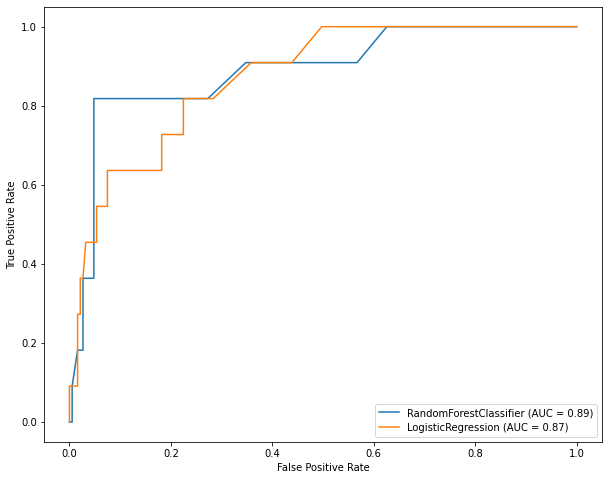

In [111]:
fig,ax = plt.subplots(figsize=(10,8))

plot_roc_curve(rf_model,X_test,y_test,ax=ax,response_method='predict_proba');
plot_roc_curve(logit_model2,X_test,y_test,ax=ax,response_method='predict_proba');
# plt.axvline(x=0.15,color='red');

In [112]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds =roc_curve(y_train, logit_model2.predict_proba(X_train)[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.931027
